In [2]:
import pickle

# 1)
data = pickle.load(open('data.pickle', 'rb'))

In [3]:
import numpy as np
import scipy.stats

# 2)
µ = np.zeros((2,))
Σ = np.eye(2)

In [4]:
# 3)
def estimateProbability(x, h):
    d = 2
    N = data.shape[0]
    
    s = 0
    for i in range(N):
        x_i = data[i]
        arg = (x_i - x) / h
        s += scipy.stats.multivariate_normal.pdf(x=arg, mean=µ, cov=Σ)
        
    return s / (h**d * N)

<IPython.core.display.Javascript object>


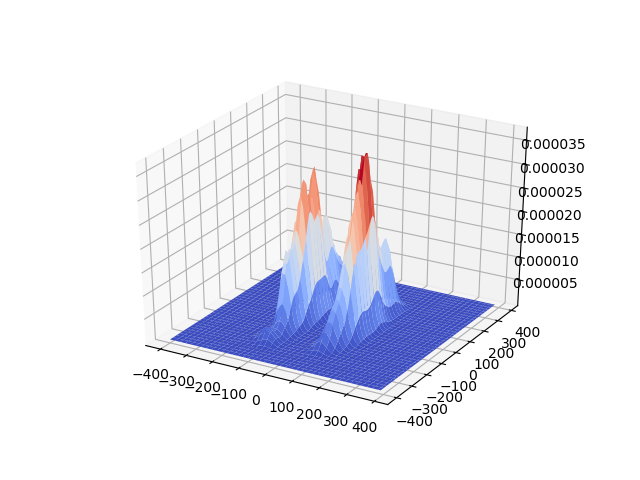

In [16]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook

# 4)
dimSize = (400+400)//10
x = y = z = np.empty((dimSize, dimSize))

for xi in range(-400, 400, 10):
    for yi in range(-400, 400, 10):
        xp = (xi + 400) // 10
        yp = (yi + 400) // 10
        x[xp][yp] = xi
        y[xp][yp] = yi
        z[xp][yp] = estimateProbability([xi, yi], h)
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, yv, z, cmap=cm.coolwarm)
plt.show()